### Importação dos dados



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [62]:
valor_vendas_total_loja1 = loja['Preço'].sum()
valor_vendas_total_loja2 = loja2['Preço'].sum()
valor_vendas_total_loja3 = loja3['Preço'].sum()
valor_vendas_total_loja4 = loja4['Preço'].sum()

quantidade_vendas_loja1= len(loja)
quantidade_vendas_loja2= len(loja2)
quantidade_vendas_loja3= len(loja3)
quantidade_vendas_loja4= len(loja4)


ticket_medio_loja1 = valor_vendas_total_loja1 / quantidade_vendas_loja1
ticket_medio_loja2 = valor_vendas_total_loja2 / quantidade_vendas_loja2
ticket_medio_loja3 = valor_vendas_total_loja3 / quantidade_vendas_loja3
ticket_medio_loja4 = valor_vendas_total_loja4 / quantidade_vendas_loja4

vendas = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
        'Qtd Vendas': [
        quantidade_vendas_loja1,
        quantidade_vendas_loja2,
        quantidade_vendas_loja3,
        quantidade_vendas_loja4
    ],
    'Valor Total': [
        valor_vendas_total_loja1,
        valor_vendas_total_loja2,
        valor_vendas_total_loja3,
        valor_vendas_total_loja4
    ],
    'Ticket Médio': [
        round(ticket_medio_loja1,2),
        round(ticket_medio_loja2,2),
        round(ticket_medio_loja3,2),
        round(ticket_medio_loja4,2)
    ]
}

df_faturamento_lojas = pd.DataFrame(vendas)
df_faturamento_lojas

,Loja,Qtd Vendas,Valor Total,Ticket Médio
0,Loja 1,2359,1534509.12,650.49
1,Loja 2,2359,1488459.06,630.97
2,Loja 3,2359,1464025.03,620.61
3,Loja 4,2358,1384497.58,587.15


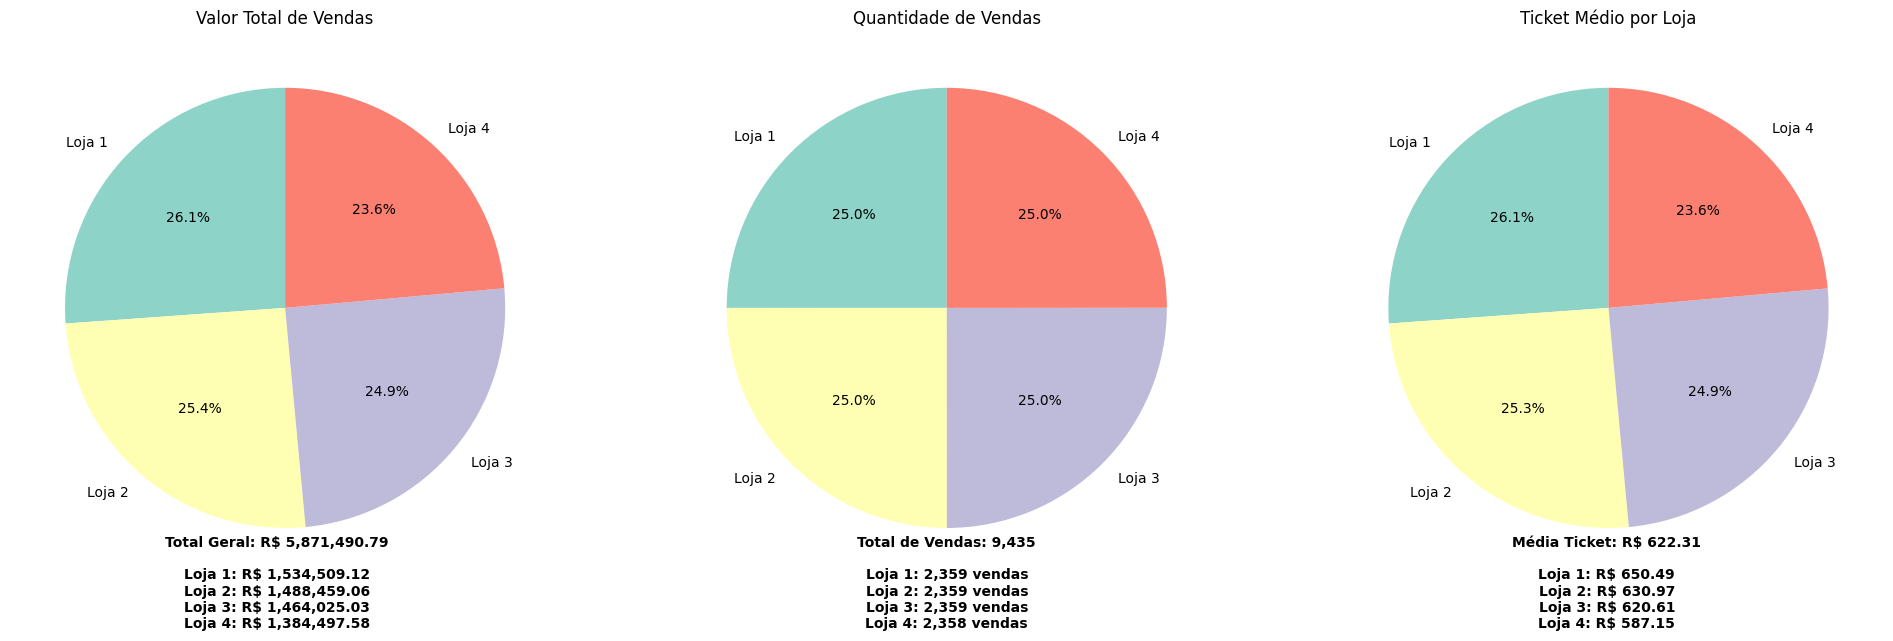

In [73]:
lojas = df_faturamento_lojas['Loja']
valores_totais = df_faturamento_lojas['Valor Total']
quantidades = df_faturamento_lojas['Qtd Vendas']
tickets = df_faturamento_lojas['Ticket Médio']

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
cores = plt.cm.Set3.colors

total_vendas = valores_totais.sum()

axs[0].pie(
    valores_totais,
    labels=lojas,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores
)
axs[0].set_title('Valor Total de Vendas')

texto_valores = f"Total Geral: R$ {total_vendas:,.2f}\n\n" + "\n".join(
    [f"{loja}: R$ {valor:,.2f}" for loja, valor in zip(lojas, valores_totais)]
)
fig.text(0.165, -0.05, texto_valores, ha='center', fontsize=10, fontweight='bold')


total_qtd = quantidades.sum()

axs[1].pie(
    quantidades,
    labels=lojas,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores
)
axs[1].set_title('Quantidade de Vendas')

texto_qtd = f"Total de Vendas: {total_qtd:,}\n\n" + "\n".join(
    [f"{loja}: {qtd:,} vendas" for loja, qtd in zip(lojas, quantidades)]
)
fig.text(0.5, -0.05, texto_qtd, ha='center', fontsize=10, fontweight='bold')


media_geral_ticket = tickets.mean()

axs[2].pie(
    tickets,
    labels=lojas,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores
)
axs[2].set_title('Ticket Médio por Loja')

texto_ticket = f"Média Ticket: R$ {media_geral_ticket:,.2f}\n\n" + "\n".join(
    [f"{loja}: R$ {ticket:,.2f}" for loja, ticket in zip(lojas, tickets)]
)
fig.text(0.83, -0.05, texto_ticket, ha='center', fontsize=10, fontweight='bold')



plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [12]:
df_categorias_loja1 = loja['Categoria do Produto'].value_counts().reset_index()
df_categorias_loja1.columns = ['Categoria', 'Loja 1']

df_categorias_loja2 = loja2['Categoria do Produto'].value_counts().reset_index()
df_categorias_loja2.columns = ['Categoria', 'Loja 2']

df_categorias_loja3 = loja3['Categoria do Produto'].value_counts().reset_index()
df_categorias_loja3.columns = ['Categoria', 'Loja 3']

df_categorias_loja4 = loja4['Categoria do Produto'].value_counts().reset_index()
df_categorias_loja4.columns = ['Categoria', 'Loja 4']

df_categorias_lojas = df_categorias_loja1.merge(
    df_categorias_loja2, on='Categoria', how='outer'
).merge(
    df_categorias_loja3, on='Categoria', how='outer'
).merge(
    df_categorias_loja4, on='Categoria', how='outer'
)

df_categorias_lojas



,Categoria,Loja 1,Loja 2,Loja 3,Loja 4
0,brinquedos,324,313,315,338
1,eletrodomesticos,312,305,278,254
2,eletronicos,448,422,451,451
3,esporte e lazer,284,275,277,277
4,instrumentos musicais,182,224,177,170
5,livros,173,197,185,187
6,moveis,465,442,499,480
7,utilidades domesticas,171,181,177,201


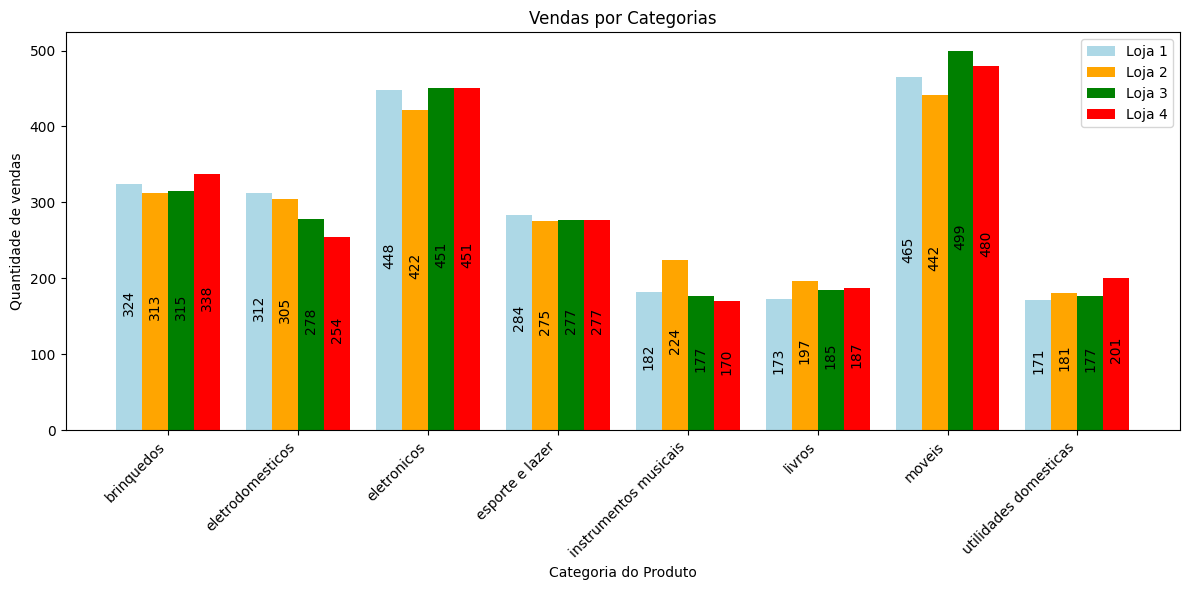

In [53]:
categorias = df_categorias_lojas['Categoria']

loja1_valores_categorias = df_categorias_lojas['Loja 1']
loja2_valores_categorias = df_categorias_lojas['Loja 2']
loja3_valores_categorias = df_categorias_lojas['Loja 3']
loja4_valores_categorias = df_categorias_lojas['Loja 4']

x=np.arange(len(categorias))
largura = 0.2

fig, ax = plt.subplots(figsize =(12,6))

barras_loja1_categorias = ax.bar(x -1.5 * largura, loja1_valores_categorias, largura, label ='Loja 1', color ='lightblue' )
barras_loja2_categorias = ax.bar(x -0.5 * largura, loja2_valores_categorias, largura, label ='Loja 2', color ='orange' )
barras_loja3_categorias = ax.bar(x +0.5 * largura, loja3_valores_categorias, largura, label ='Loja 3', color ='green' )
barras_loja4_categorias = ax.bar(x +1.5 * largura, loja4_valores_categorias, largura, label ='Loja 4', color ='red' )

ax.bar_label(barras_loja1_categorias, padding=3, label_type='center',rotation=90)
ax.bar_label(barras_loja2_categorias, padding=3,label_type='center',rotation=90)
ax.bar_label(barras_loja3_categorias, padding=3,label_type='center',rotation=90)
ax.bar_label(barras_loja4_categorias, padding=3,label_type='center',rotation=90)

ax.set_title('Vendas por Categorias')
ax.set_xlabel('Categoria do Produto')
ax.set_ylabel('Quantidade de vendas')
ax.set_xticks(x)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [16]:
media_avaliacao_loja1 = loja['Avaliação da compra'].sum() / len(loja)
media_avaliacao_loja2 = loja2['Avaliação da compra'].sum() / len(loja2)
media_avaliacao_loja3 = loja3['Avaliação da compra'].sum() / len(loja3)
media_avaliacao_loja4 = loja4['Avaliação da compra'].sum() / len(loja4)

df_avaliacoes_loja1 = loja['Avaliação da compra'].value_counts().reset_index()
df_avaliacoes_loja1.columns = ['Avaliação', 'Loja 1']

df_avaliacoes_loja2 = loja2['Avaliação da compra'].value_counts().reset_index()
df_avaliacoes_loja2.columns = ['Avaliação', 'Loja 2']

df_avaliacoes_loja3 = loja3['Avaliação da compra'].value_counts().reset_index()
df_avaliacoes_loja3.columns = ['Avaliação', 'Loja 3']

df_avaliacoes_loja4 = loja4['Avaliação da compra'].value_counts().reset_index()
df_avaliacoes_loja4.columns = ['Avaliação', 'Loja 4']

df_avaliacoes_lojas = df_avaliacoes_loja1.merge(
    df_avaliacoes_loja2, on='Avaliação', how='outer'
).merge(
    df_avaliacoes_loja3, on='Avaliação', how='outer'
).merge(
    df_avaliacoes_loja4, on='Avaliação', how='outer'
)

linha_media = {
    'Avaliação': 'Média',
    'Loja 1': round(media_avaliacao_loja1, 2),
    'Loja 2': round(media_avaliacao_loja2, 2),
    'Loja 3': round(media_avaliacao_loja3, 2),
    'Loja 4': round(media_avaliacao_loja4, 2),
}

df_avaliacoes_lojas = pd.concat(
    [df_avaliacoes_lojas, pd.DataFrame([linha_media])],
    ignore_index=True
)

df_avaliacoes_lojas

,Avaliação,Loja 1,Loja 2,Loja 3,Loja 4
0,1,319.00,273.00,297.00,310.0
1,2,86.00,93.00,79.00,85.0
2,3,218.00,209.00,193.00,210.0
3,4,444.00,482.00,434.00,453.0
4,5,1292.00,1302.00,1356.00,1300.0
5,Média,3.98,4.04,4.05,4.0


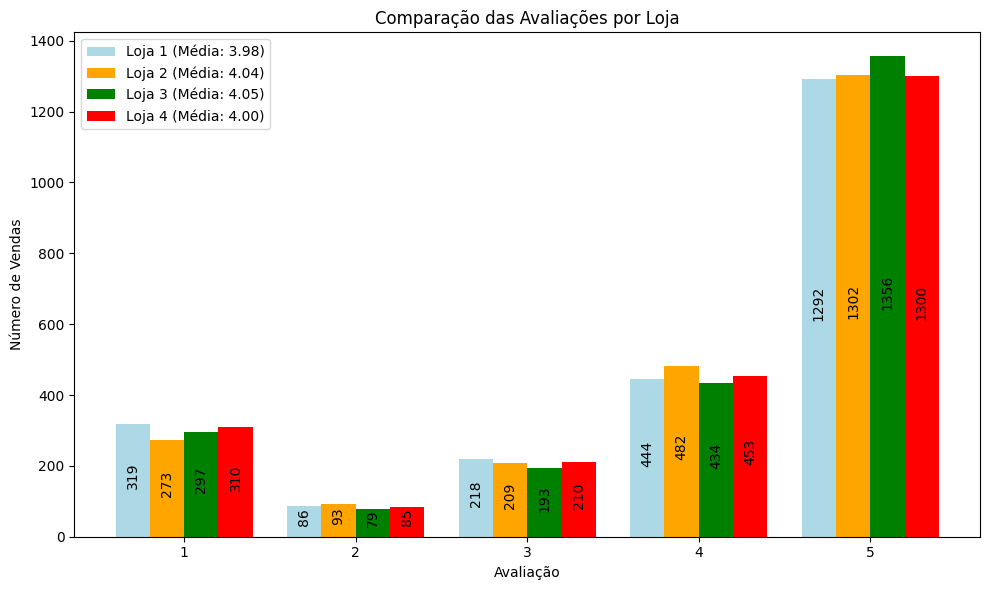

In [54]:
avaliacoes = df_avaliacoes_lojas['Avaliação'][:-1]

loja1_valores_avaliacoes = df_avaliacoes_lojas['Loja 1'][:-1]
loja2_valores_avaliacoes = df_avaliacoes_lojas['Loja 2'][:-1]
loja3_valores_avaliacoes = df_avaliacoes_lojas['Loja 3'][:-1]
loja4_valores_avaliacoes = df_avaliacoes_lojas['Loja 4'][:-1]

media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()


x = np.arange(len(avaliacoes))
largura = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

barras_loja1_avaliacoes = ax.bar(x - 1.5 * largura, loja1_valores_avaliacoes, largura, label=f'Loja 1 (Média: {media_avaliacao_loja1:.2f})', color='lightblue')
barras_loja2_avaliacoes = ax.bar(x - 0.5 * largura, loja2_valores_avaliacoes, largura, label=f'Loja 2 (Média: {media_avaliacao_loja2:.2f})', color='orange')
barras_loja3_avaliacoes = ax.bar(x + 0.5 * largura, loja3_valores_avaliacoes, largura, label=f'Loja 3 (Média: {media_avaliacao_loja3:.2f})', color='green')
barras_loja4_avaliacoes = ax.bar(x + 1.5 * largura, loja4_valores_avaliacoes, largura, label=f'Loja 4 (Média: {media_avaliacao_loja4:.2f})', color='red')

ax.bar_label(barras_loja1_avaliacoes, padding=3, label_type='center',rotation=90)
ax.bar_label(barras_loja2_avaliacoes, padding=3,label_type='center',rotation=90)
ax.bar_label(barras_loja3_avaliacoes, padding=3,label_type='center',rotation=90)
ax.bar_label(barras_loja4_avaliacoes, padding=3,label_type='center',rotation=90)

ax.set_title('Comparação das Avaliações por Loja')
ax.set_xlabel('Avaliação')
ax.set_ylabel('Número de Vendas')
ax.set_xticks(x)
ax.set_xticklabels(avaliacoes)

ax.legend()

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [24]:
df_produtos_vendidos_loja1 = loja['Produto'].value_counts().reset_index()
df_produtos_vendidos_loja1.columns = ['Avaliação', 'Quantidade']

df_produtos_vendidos_loja2 = loja2['Produto'].value_counts().reset_index()
df_produtos_vendidos_loja2.columns = ['Avaliação', 'Quantidade']

df_produtos_vendidos_loja3 = loja3['Produto'].value_counts().reset_index()
df_produtos_vendidos_loja3.columns = ['Avaliação', 'Quantidade']

df_produtos_vendidos_loja4 = loja4['Produto'].value_counts().reset_index()
df_produtos_vendidos_loja4.columns = ['Produto', 'Quantidade']

produto_mais_vendido_loja1 = loja['Produto'].value_counts().idxmax()
qtd_mais_vendido_loja1 = loja['Produto'].value_counts().max()
produto_menos_vendido_loja1 = loja['Produto'].value_counts().idxmin()
qtd_menos_vendido_loja1 = loja['Produto'].value_counts().min()

produto_mais_vendido_loja2 = loja2['Produto'].value_counts().idxmax()
qtd_mais_vendido_loja2 = loja2['Produto'].value_counts().max()
produto_menos_vendido_loja2 = loja2['Produto'].value_counts().idxmin()
qtd_menos_vendido_loja2 = loja2['Produto'].value_counts().min()

produto_mais_vendido_loja3 = loja3['Produto'].value_counts().idxmax()
qtd_mais_vendido_loja3 = loja3['Produto'].value_counts().max()
produto_menos_vendido_loja3 = loja3['Produto'].value_counts().idxmin()
qtd_menos_vendido_loja3 = loja3['Produto'].value_counts().min()

produto_mais_vendido_loja4 = loja4['Produto'].value_counts().idxmax()
qtd_mais_vendido_loja4 = loja4['Produto'].value_counts().max()
produto_menos_vendido_loja4 = loja4['Produto'].value_counts().idxmin()
qtd_menos_vendido_loja4 = loja4['Produto'].value_counts().min()

df_produtos_vendidos = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Produto Mais Vendido': [
        produto_mais_vendido_loja1,
        produto_mais_vendido_loja2,
        produto_mais_vendido_loja3,
        produto_mais_vendido_loja4
    ],
    'Qtd Mais': [
        qtd_mais_vendido_loja1,
        qtd_mais_vendido_loja2,
        qtd_mais_vendido_loja3,
        qtd_mais_vendido_loja4
    ],
    'Produto Menos Vendido': [
        produto_menos_vendido_loja1,
        produto_menos_vendido_loja2,
        produto_menos_vendido_loja3,
        produto_menos_vendido_loja4
    ],
    'Qtd Menos': [
        qtd_menos_vendido_loja1,
        qtd_menos_vendido_loja2,
        qtd_menos_vendido_loja3,
        qtd_menos_vendido_loja4
    ]
})
df_produtos_vendidos

,Loja,Produto Mais Vendido,Qtd Mais,Produto Menos Vendido,Qtd Menos
0,Loja 1,Micro-ondas,60,Headset,33
1,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,Loja 3,Kit banquetas,57,Blocos de montar,35
3,Loja 4,Cama box,62,Guitarra,33


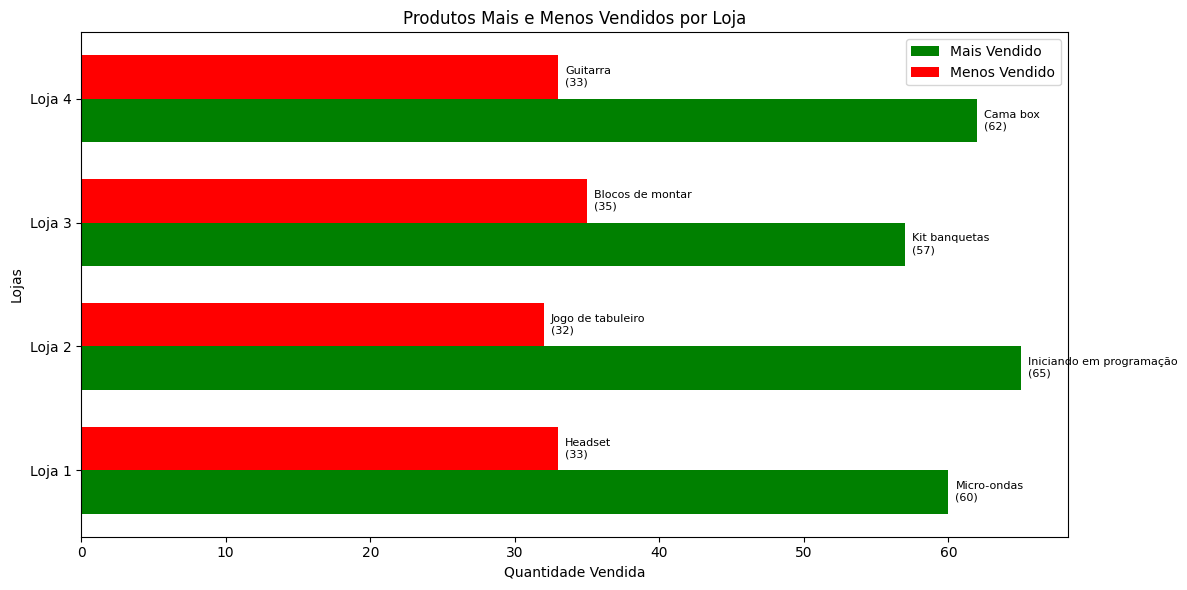

In [39]:
lojas_pv = df_produtos_vendidos['Loja']
qtd_mais = df_produtos_vendidos['Qtd Mais']
qtd_menos = df_produtos_vendidos['Qtd Menos']
produtos_mais = df_produtos_vendidos['Produto Mais Vendido']
produtos_menos = df_produtos_vendidos['Produto Menos Vendido']

y = np.arange(len(lojas_pv))
largura = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

barras1 = ax.barh(y - largura/2, qtd_mais, largura, label='Mais Vendido', color='green')
barras2 = ax.barh(y + largura/2, qtd_menos, largura, label='Menos Vendido', color='red')

ax.set_title('Produtos Mais e Menos Vendidos por Loja')
ax.set_xlabel('Quantidade Vendida')
ax.set_ylabel('Lojas')
ax.set_yticks(y)
ax.set_yticklabels(lojas_pv)
ax.legend()

for i in range(len(lojas_pv)):
    ax.annotate(f'{produtos_mais[i]}\n({qtd_mais[i]})',
                xy=(qtd_mais[i], y[i] - largura/2),
                xytext=(5, 0),
                textcoords="offset points",
                va='center', fontsize=8)

    ax.annotate(f'{produtos_menos[i]}\n({qtd_menos[i]})',
                xy=(qtd_menos[i], y[i] + largura/2),
                xytext=(5, 0),
                textcoords="offset points",
                va='center', fontsize=8)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [25]:
media_frete_loja1 = loja['Frete'].sum() / len(loja)
media_frete_loja2 = loja2['Frete'].sum() / len(loja2)
media_frete_loja3 = loja3['Frete'].sum() / len(loja3)
media_frete_loja4 = loja4['Frete'].sum() / len(loja4)

df_media_frete = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média do Frete': [
        round(media_frete_loja1, 2),
        round(media_frete_loja2, 2),
        round(media_frete_loja3, 2),
        round(media_frete_loja4, 2)
    ]
})

df_media_frete


,Loja,Média do Frete
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


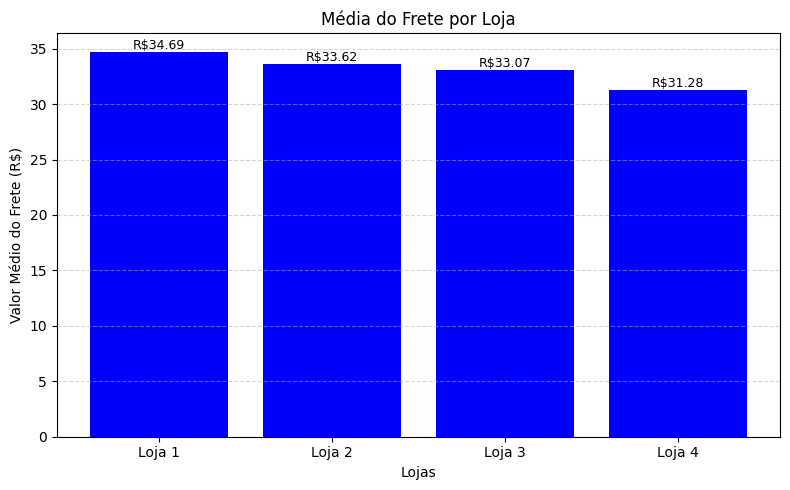

In [76]:
lojas_frete = df_media_frete['Loja']
medias_frete = df_media_frete['Média do Frete']

plt.figure(figsize=(8, 5))
barras = plt.bar(lojas_frete, medias_frete, color='blue')

for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura,
             f'R${altura:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Média do Frete por Loja')
plt.xlabel('Lojas')
plt.ylabel('Valor Médio do Frete (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#Relatório Final


## O faturamento total das lojas

*   Loja 1: R$1.534.509,12

*   Loja 2: R$1.488.459,06

*   Loja 3: R$1.464.025,03

*   Loja 4: R$1.384.497,58

## Avaliação dos Clientes

*   Loja 1: Média 3.98

*   Loja 2: Média 4.04

*   Loja 3: Média 4.05

*   Loja 4: Média 4.00

## Frete Médio por Loja

*  Loja 1: R$34,69

*  Loja 2: R$33,62

*  Loja 3: R$33,07

*  Loja 4: R$31,28

##5. Ticket Médio por Loja

*  Loja 1: R$650,49

*  Loja 2: R$630,97

*  Loja 3: R$620,61

*  Loja 4: R$587,15

##Produtos mais vendidos:

*  Loja 1: Micro-ondas (60 unidades)

*  Loja 2: Iniciando em Programação (65 unidades)

*  Loja 3: Kit banquetas (57 unidades)

*  Loja 4: Cama box (62 unidades)

##Produtos menos vendidos:

*  Loja 1: Headset (33 unidades)

*  Loja 2: Jogo de tabuleiro (32 unidades)

*  Loja 3: Blocos de montar (35 unidades)

*  Loja 4: Guitarra (33 unidades)
---
### A loja com melhor desempenho

A Loja 1 apresenta o maior faturamento total(R\$1.534.509,12) entre todas as unidades, impulsionado por um ticket médio de R\$650,97 — o mais elevado da amostra.

Embora possua o maior custo médio de frete (R\$ 34,69), a rentabilidade por pedido permanece superior, alcançando R\$587,54, evidenciando um bom desempenho em termos de margem por transação.

Contudo, a principal limitação observada refere-se à avaliação média dos clientes, que ficou em 3.98, sendo a mais baixa entre as lojas analisadas. Este indicador sugere possíveis fragilidades na experiência do consumidor, no atendimento prestado ou no prazo de entrega já que a mesma possui o maior valor médio de frete.

### A loja com pior desempennho

Em contraste com a Loja 1, a Loja 4 apresenta o pior desempenho financeiro entre as unidades, com o menor faturamento total (R\$1.384.497,58), o ticket médio mais baixo (R\$587,15) e a menor rentabilidade por pedido (R\$555,87), mesmo com o menor custo médio de frete (R\$31,28).

Além do desempenho financeiro inferior, a Loja 4 também registra a segunda pior média de avaliação dos clientes, com nota 4.0, o que pode indicar falhas na experiência do consumidor e contribuir diretamente para a baixa performance em vendas.

No que diz respeito à composição das vendas, o produto mais vendido da Loja 4 é a cama box, pertencente à categoria de móveis — uma das categorias de maior volume de vendas em todas as lojas. Por outro lado, o produto menos vendido é a guitarra, inserida na categoria de instrumentos musicais, que consistentemente apresenta a menor demanda no conjunto das lojas avaliadas.

###Recomendação para Fechamento
Com base nos indicadores analisados, recomenda-se o fechamento da Loja 4, uma vez que ela apresenta o menor faturamento total, a menor rentabilidade por pedido e uma das piores médias de avaliação dos clientes.